In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from termcolor import colored

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

### KMEANS

We would be Doing KMeans on an Image Dataset MNIST 

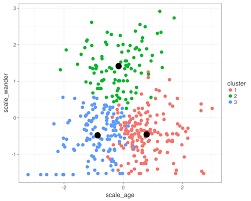



**Clustering About 50000 Images into various clusters namely 3 4 5 and 10** 

In [ ]:
Clustering_Data= x_train[1:50001]
Work_Matrix=np.array(Clustering_Data)
Pixels_data = Work_Matrix.flatten().reshape(50000,784)

In [ ]:
Pixels_data.shape

(50000, 784)

Normalizing the Dataset in the range of 0 and 1

In [ ]:
Normalized_Pixel_Val=(Pixels_data/255)

In [ ]:
Normalized_Pixel_Val.shape

(50000, 784)

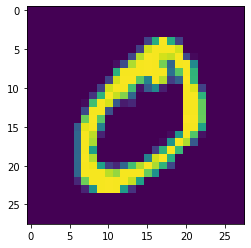

In [ ]:
plt.imshow(Normalized_Pixel_Val[0].reshape(28,28)) 

**The Following Code of Kmeans Proceed In 3 Ways**



1.   Intializing the Clusters Centroid 
2.   Segmenting the Image Based on which Clusters are closer
3.   Recalculating the Centroid of Clusters 
4.   Perfoming the Step 2 and Step 3 until The Clusters Centroid Becomes Stable

Important Variable Names -

> Clusters_Centroid = Stores the Cluster Centroid at every iteration

> Pixels_in_Clusters = List of Lists which stores the Images which are in each of the clusters 

> Stopping_Criterion = Stores the previous Points and serves as a termination condition





In [ ]:
def KMEANS(n):
  random.seed(10)
  No_of_Clusters=n
  Clusters_Centroid=[]
  for i in range(No_of_Clusters):
    Temp=np.array([random.random() for x in range(784)])
    Clusters_Centroid.append(Temp)

  Pixels_in_Clusters=[]
  for i in range(No_of_Clusters):
    Pixels_in_Clusters.append([])

  #The below code Segments the Images onto the nearest cluster pointers 

  for i in range(len(Normalized_Pixel_Val)):
    Clusters_Temp=[]
    for j in range(No_of_Clusters):
      Temp=np.linalg.norm(Clusters_Centroid[j]-Normalized_Pixel_Val[i])
    #print(i,j,Temp)
      Clusters_Temp.append(Temp)
    Indexing=Clusters_Temp.index(min(Clusters_Temp))
    Pixels_in_Clusters[Indexing].append(i)

 # The Below Code Starts the Training with 10 iterations or the centroid becomes stabel 
 # as the stopping crietrion
  for training in range(10):
    Stopping_Criterion=Pixels_in_Clusters[-1]
    Stopping_Criterion_1=Pixels_in_Clusters[-2]
    #Calculate the updated centroids
    for i in range(No_of_Clusters):
      Temp=[]
      for elements in Pixels_in_Clusters[i]:
      #print(elements)
        Temp.append(Normalized_Pixel_Val[elements])
      Temp=np.array(Temp)
      Temp1 = np.mean(Temp,axis=0)
    #plt.imshow(Temp1.reshape(28,28))
      Clusters_Centroid[i]=Temp1
    
    Pixels_in_Clusters=[]

    for i in range(No_of_Clusters):
        Pixels_in_Clusters.append([])

    
    #Recalculate the Distance Again
    for i in range(len(Normalized_Pixel_Val)):
        Clusters_Temp=[]
        for j in range(No_of_Clusters):
          Temp=np.linalg.norm(Clusters_Centroid[j]-Normalized_Pixel_Val[i])
    #print(i,j,Temp)
          Clusters_Temp.append(Temp)
        Indexing=Clusters_Temp.index(min(Clusters_Temp))
        Pixels_in_Clusters[Indexing].append(i)
  
    #Stopping Crietrions 

    if((Stopping_Criterion==Pixels_in_Clusters[-1]) and (Stopping_Criterion_1==Pixels_in_Clusters[-2])):
      break
  
  #The outputs
  print("The no of clusters are ",n)
  print("The no of images belonging to each of the cluster are ",end="")
  print([len(Pixels_in_Clusters[x]) for x in  range(len(Pixels_in_Clusters))])   

  Length=[x for x in range(len(Clusters_Centroid))]
  print("The clusterimages are in order " , ' '.join([str(elem) for elem in Length])) 
  for centroid in range(len(Clusters_Centroid)):
    try:
      plt.figure()
      plt.imshow(Clusters_Centroid[centroid].reshape(28,28))
    except:
      print("\n\nCluster",centroid+1,"has no image data point")
    
  
  #plt.imshow(Clusters_Centroid[0].reshape(28,28))





The no of clusters are  2
The no of images belonging to each of the cluster are [25365, 24635]
The clusterimages are in order  0 1


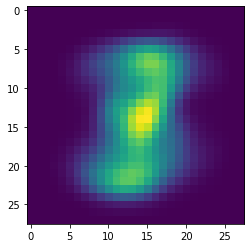

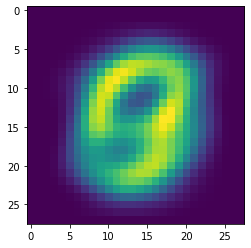

In [ ]:
KMEANS(2)

The no of clusters are  3
The no of images belonging to each of the cluster are [20013, 16092, 13895]
The clusterimages are in order  0 1 2


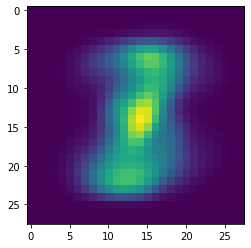

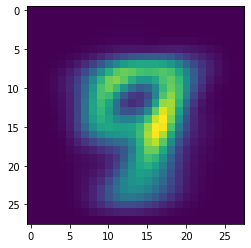

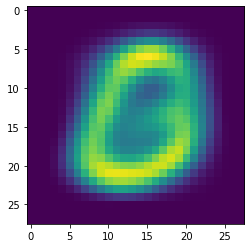

In [ ]:
KMEANS(3)

The no of clusters are  5
The no of images belonging to each of the cluster are [11644, 14368, 9013, 10425, 4550]
The clusterimages are in order  0 1 2 3 4


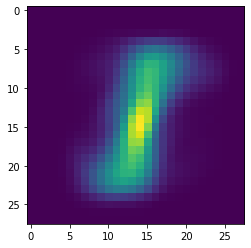

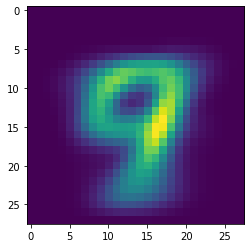

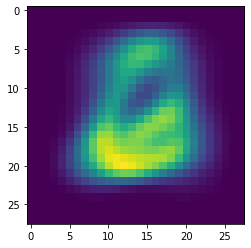

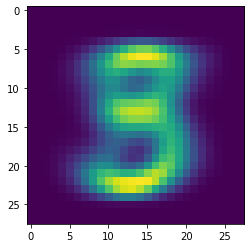

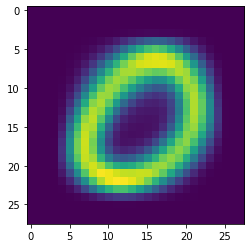

In [ ]:
KMEANS(5)

The no of clusters are  6
The no of images belonging to each of the cluster are [10305, 9170, 8537, 7676, 4452, 9860]
The clusterimages are in order  0 1 2 3 4 5


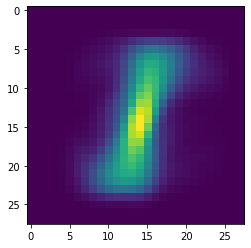

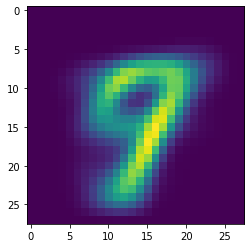

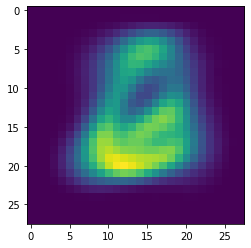

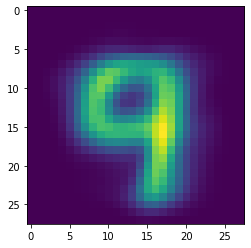

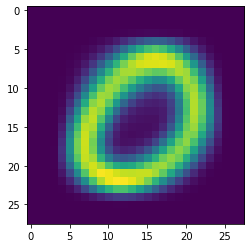

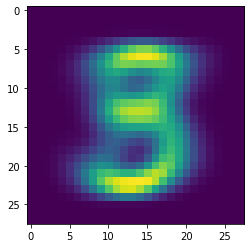

In [ ]:
KMEANS(6)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The no of clusters are  10
The no of images belonging to each of the cluster are [6574, 5410, 3760, 4481, 3975, 5627, 0, 8350, 4064, 7759]
The clusterimages are in order  0 1 2 3 4 5 6 7 8 9


Cluster 7 has no image data point


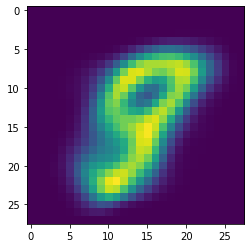

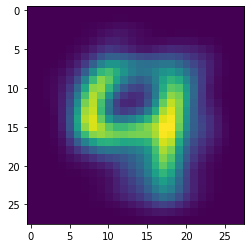

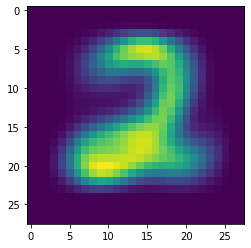

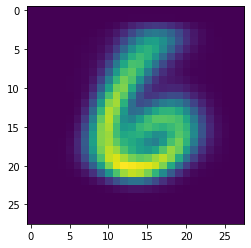

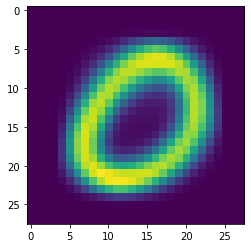

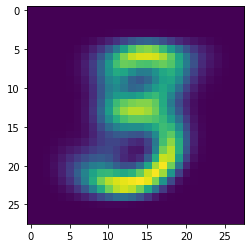

<Figure size 432x288 with 0 Axes>

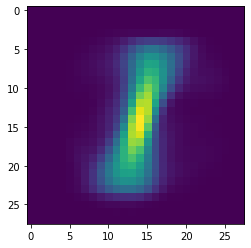

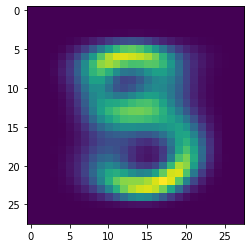

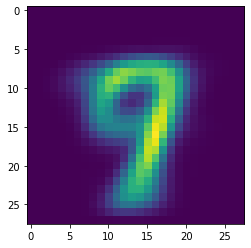

In [ ]:
KMEANS(10)

**Interestingly in all the above points the Clusters Resembles that of the Images in the Dataset**

--------------------------------------------------------------------------------

## Principle Component Analysis 

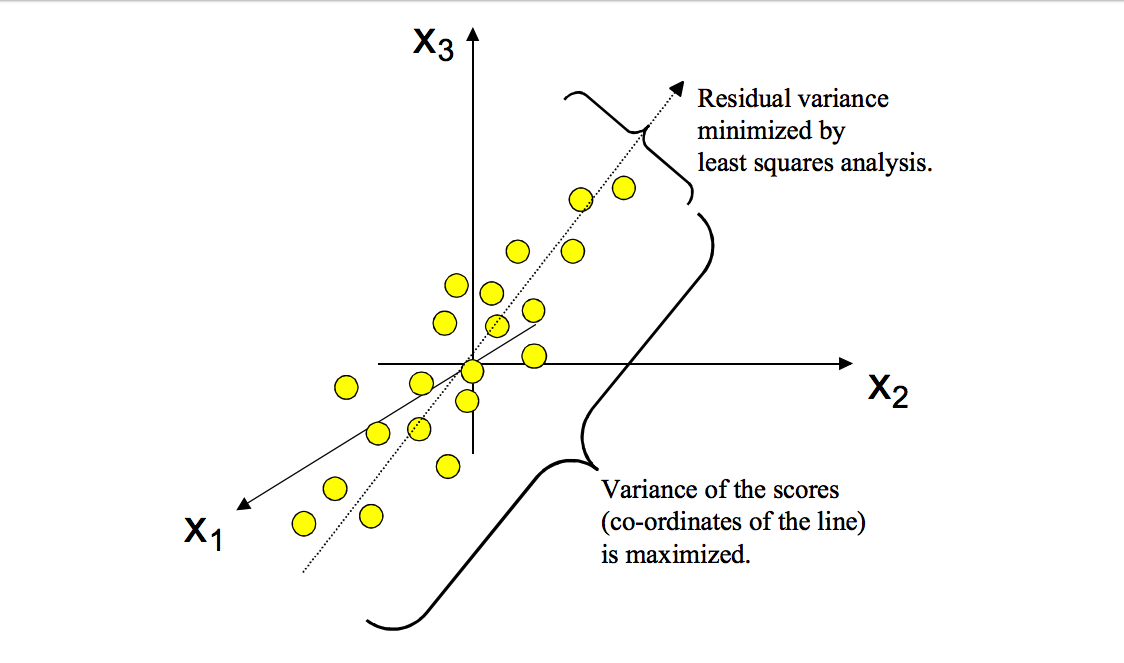



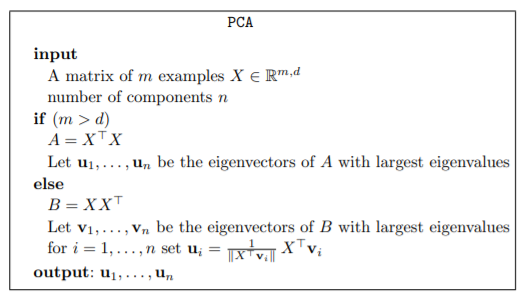

### Part 1 Segmenting a Single Image






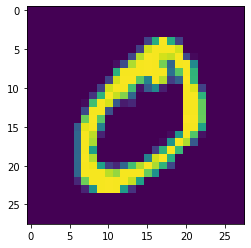

In [ ]:
plt.imshow(x_train[1:2].reshape(28,28))

**Original Image**

In [ ]:
Clustering_Data= x_train[1:2]  
Work_Matrix=np.array(Clustering_Data)
PCA_Pixels = Work_Matrix.flatten().reshape(1,784)  

In [ ]:
PCA_Pixels=(PCA_Pixels/255)

In [ ]:
PCA_Pixels.shape

(1, 784)

In [ ]:
B=np.matmul(PCA_Pixels,np.transpose(PCA_Pixels))
Eigen=np.linalg.eig(B)
Eigen_Sorted=sorted(Eigen[0],reverse=True)
Indexes_Eigen = [list(Eigen[0]).index(x) for x in Eigen_Sorted]

In [ ]:
#eigen value and vector of the single image
Eigen

(array([103.81147251]), array([[1.]]))

In [ ]:
Adjusted_Eigen_Vectors = []
Temp=[]
for elements in Eigen[1]:
  #FINDING U vector
  Temporary=np.matmul(np.transpose(PCA_Pixels),elements)
  X=Temporary/np.linalg.norm(Temporary)
  #Construct Matrix
  Temp.append(X)

Reconstruced_Image=np.transpose(Temp)

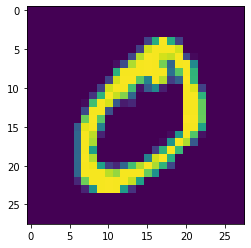

In [ ]:
plt.imshow(Reconstruced_Image.reshape(28,28))

**Reconstructed Image**

### Part 2 Multiple Images 

**Here we will Dimensionality Reduction of 400 Images**

d>m Hence we will be following 2nd part of the Algorithm

> Kindly Note : Since we will be Decompositing 400 Images PCA will Retain Maximum Information from the Point of view of Classification , thus the Principle Components Obtained here will be helpful for Classification of Images into categores 





In [ ]:
#400 Images Select and Normalizing
Clustering_Data= x_train[1:401]  
Work_Matrix=np.array(Clustering_Data)
PCA_Pixels = Work_Matrix.flatten().reshape(400,784)  
PCA_Pixels=(PCA_Pixels/255)


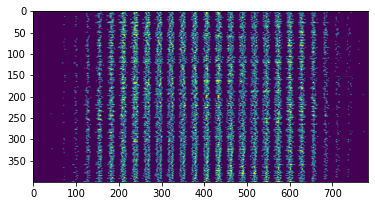

In [ ]:
plt.imshow(PCA_Pixels)

* Image of dim(400,784) Original Matrix *

**The PCA will Try to retain as much information from the above images depending upon the eigen vectors taken**

In [ ]:
B=np.matmul(PCA_Pixels,np.transpose(PCA_Pixels))
Eigen=np.linalg.eig(B)

In [ ]:
Eigen[1].shape

(400, 400)

**The Eigen Variables Stores the EigenValues and corresponding Eigen Vectors**

In [ ]:
Eigen_Sorted=sorted(Eigen[0],reverse=True)
Indexes_Eigen = [list(Eigen[0]).index(x) for x in Eigen_Sorted]

# The Indexes Eigen will  store the Indexes of Top Eigen Value so that we can index the corresponding eigen Vectpr

**Following Function will allow us to choose n top eigen vectors (n principal components)**

In [ ]:
Adjusted_Eigen_Vectors = []
Temp=[]
def Error(n):
  Summation=0
  for i in range(n):
    Summation+=Eigen_Sorted[i]

  Difference=np.sum(Eigen_Sorted)-Summation
  Total_Sum=np.sum(Eigen_Sorted)
 # print(np.sum(Eigen))
  print("Principle Components-",n,end="")
  print(" = ",Difference/Total_Sum)

In [ ]:
print("Reconstructed Error is equal to sum of discarded Eigern Values")
print("Reconstructed Error")
print("Total Principal Components",len(Eigen_Sorted))
print("-------------------------------------------")
for i in range(20):
  Error(i)

Reconstructed Error is equal to sum of discarded Eigern Values
Reconstructed Error
Total Principal Components 400
-------------------------------------------
Principle Components- 0 =  1.0
Principle Components- 1 =  0.5701885665258268
Principle Components- 2 =  0.515954192866266
Principle Components- 3 =  0.46728537015927263
Principle Components- 4 =  0.427386609120634
Principle Components- 5 =  0.3941483298834513
Principle Components- 6 =  0.36375076444559346
Principle Components- 7 =  0.3381559849171404
Principle Components- 8 =  0.3182709813026657
Principle Components- 9 =  0.3002761088207138
Principle Components- 10 =  0.28543555115114666
Principle Components- 11 =  0.2709085854671675
Principle Components- 12 =  0.25831431255854687
Principle Components- 13 =  0.2470362954967674
Principle Components- 14 =  0.23619197332794353
Principle Components- 15 =  0.22628332870979356
Principle Components- 16 =  0.2168255593806221
Principle Components- 17 =  0.208268201388904
Principle Componen

**In the Following Code we will Show the Eigen Vectors of the few Principal Components as well as the image formed by those principal Components**

In [ ]:
Adjusted_Eigen_Vectors = []
Temp=[]
def Eigen_Vectors(n):
  for elements in range(n):
    #Finding U vector
    Temporary=np.matmul(np.transpose(PCA_Pixels),Eigen[1][Indexes_Eigen[elements]])
    X=Temporary/np.linalg.norm(Temporary)
    #Reconstructing the Matrix acc to algorithm
    Temp.append(X)
  
  count=(len(Temp),len(Temp[0]))
  print("Dimensions of Eigen Vector")
  print(count)
  print("Image Formation of Eigen Vector")
  plt.imshow(Temp)




Dimensions of Eigen Vector
(10, 784)
Image Formation of Eigen Vector


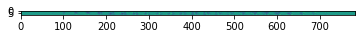

In [ ]:
Adjusted_Eigen_Vectors = []
Temp=[]
Eigen_Vectors(10)

Dimensions of Eigen Vector
(100, 784)
Image Formation of Eigen Vector


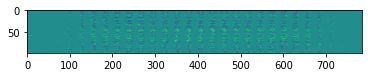

In [ ]:
Adjusted_Eigen_Vectors = []
Temp=[]
Eigen_Vectors(100)

Dimensions of Eigen Vector
(200, 784)
Image Formation of Eigen Vector


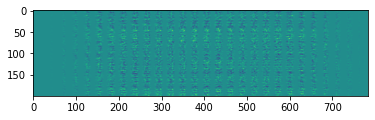

In [ ]:
Adjusted_Eigen_Vectors = []
Temp=[]
Eigen_Vectors(200)

* Following Codes Will Display the Eigen vectors corresponding to first 3 highest eigen values . The code will Executed when the cell will run with Shift+Enter

In [ ]:
Eigen[1][0]

array([-5.72846206e-02, -8.13961310e-02,  5.80659195e-03, -2.46842486e-02,
       -4.19401870e-03,  1.45463612e-01, -1.87023495e-02, -3.72291236e-02,
       -1.39956796e-02, -2.29880517e-02,  2.12642708e-02,  2.55972314e-02,
       -1.01418482e-01,  7.36034384e-03, -3.63032340e-02,  6.63108589e-03,
       -1.42768486e-03, -5.35655821e-02, -1.33814836e-02, -2.36252175e-02,
        6.24601618e-02,  4.78720886e-02, -1.00229133e-02, -1.99867059e-02,
       -2.24687897e-02,  4.35892590e-02, -2.39874476e-02,  5.71055262e-02,
        4.52443473e-02, -5.96424450e-02, -4.01840272e-02, -3.87784101e-02,
       -6.01183865e-03,  1.95436933e-02, -4.05727456e-02, -6.65683623e-03,
        3.49640830e-02,  5.97600880e-03,  1.11150269e-01, -3.46680658e-02,
        1.53641759e-02, -3.44912716e-02, -5.23901397e-02, -1.88543952e-02,
       -3.48323927e-02, -3.54082745e-02,  1.03394999e-01, -8.93338290e-03,
        7.48900534e-02, -4.30116926e-02, -4.96994886e-02, -3.02904477e-02,
       -5.71022783e-02, -

In [ ]:
Eigen[1][0]

array([-5.72846206e-02, -8.13961310e-02,  5.80659195e-03, -2.46842486e-02,
       -4.19401870e-03,  1.45463612e-01, -1.87023495e-02, -3.72291236e-02,
       -1.39956796e-02, -2.29880517e-02,  2.12642708e-02,  2.55972314e-02,
       -1.01418482e-01,  7.36034384e-03, -3.63032340e-02,  6.63108589e-03,
       -1.42768486e-03, -5.35655821e-02, -1.33814836e-02, -2.36252175e-02,
        6.24601618e-02,  4.78720886e-02, -1.00229133e-02, -1.99867059e-02,
       -2.24687897e-02,  4.35892590e-02, -2.39874476e-02,  5.71055262e-02,
        4.52443473e-02, -5.96424450e-02, -4.01840272e-02, -3.87784101e-02,
       -6.01183865e-03,  1.95436933e-02, -4.05727456e-02, -6.65683623e-03,
        3.49640830e-02,  5.97600880e-03,  1.11150269e-01, -3.46680658e-02,
        1.53641759e-02, -3.44912716e-02, -5.23901397e-02, -1.88543952e-02,
       -3.48323927e-02, -3.54082745e-02,  1.03394999e-01, -8.93338290e-03,
        7.48900534e-02, -4.30116926e-02, -4.96994886e-02, -3.02904477e-02,
       -5.71022783e-02, -

In [ ]:
Eigen[1][0]

array([-5.72846206e-02, -8.13961310e-02,  5.80659195e-03, -2.46842486e-02,
       -4.19401870e-03,  1.45463612e-01, -1.87023495e-02, -3.72291236e-02,
       -1.39956796e-02, -2.29880517e-02,  2.12642708e-02,  2.55972314e-02,
       -1.01418482e-01,  7.36034384e-03, -3.63032340e-02,  6.63108589e-03,
       -1.42768486e-03, -5.35655821e-02, -1.33814836e-02, -2.36252175e-02,
        6.24601618e-02,  4.78720886e-02, -1.00229133e-02, -1.99867059e-02,
       -2.24687897e-02,  4.35892590e-02, -2.39874476e-02,  5.71055262e-02,
        4.52443473e-02, -5.96424450e-02, -4.01840272e-02, -3.87784101e-02,
       -6.01183865e-03,  1.95436933e-02, -4.05727456e-02, -6.65683623e-03,
        3.49640830e-02,  5.97600880e-03,  1.11150269e-01, -3.46680658e-02,
        1.53641759e-02, -3.44912716e-02, -5.23901397e-02, -1.88543952e-02,
       -3.48323927e-02, -3.54082745e-02,  1.03394999e-01, -8.93338290e-03,
        7.48900534e-02, -4.30116926e-02, -4.96994886e-02, -3.02904477e-02,
       -5.71022783e-02, -

----------------------------------------------------------------------------------------------------